About the homework: In some tasks, in addition to writing code, answers to questions and conclusions are required (there are special Markdown cells marked with **Answer**).

The ability to analyze the results of experiments is an important skill. Therefore, answers carry more weight than the code: the code accounts for 30% of the task grade, while answers to questions account for 70%.

**Reminder:** Plagiarism is prohibited. Use of AI without mentioning how and in which parts it was used is also prohibited. If plagiarism or dishonest use of AI is revealed, the assignment is graded with 0.

In [200]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Let's work with data about students.

In [202]:
df = pd.read_csv('students_hw3.csv')

df.sample(4)

,ID,Performance Index,Previous Scores (out of 10),Sample Question Papers Practiced,Hours Studied,Hours Prepared for Exams,Hours Free time,Sleep Hours,Hours Not Sleep,Extracurricular Activities,Has a car,Sex,Height,Weight,BMI,Eye color,Nails length,Favorite Subject,Least Favorite Subject
566,567,67.0,7,2,7,3,12,4,20,Yes,No,m,1.651461,69.575518,25.510553,brown,0.008462,PE,Data Science
462,463,28.0,5,4,1,1,12,7,17,No,No,f,1.557934,69.667791,28.703432,gray,0.006292,Drama,History
596,597,27.0,5,4,2,1,7,7,17,Yes,No,f,1.562259,67.145534,27.511291,brown,0.004604,Machine Learning,Data Science
969,970,84.0,8,3,7,3,7,9,15,No,Yes,m,1.684115,66.535479,23.459005,gray,0.003876,Drama,Algebra


We will predict their performance index.

In [204]:
X = df.drop(columns=['Performance Index'])
y = df['Performance Index']

# Task 1 (2 points)

Let's try to propose hypothesis, which features will be the most useful.

For every feature $x^j$:

*   Draw a plot of $x^j$ and target (scatter plot, if feature is numerical and boxplot if the feature is categorical)
*   Compute correlation of  $x^j$ and target if the feature is numerical.



Draw conclusions: which features seems to be the most important? Which does not seem useful? Does it seems logical?

In [206]:
num= X.select_dtypes(include=[np.number]).columns
cat= X.select_dtypes(exclude=[np.number]).columns
len(X.columns)

18

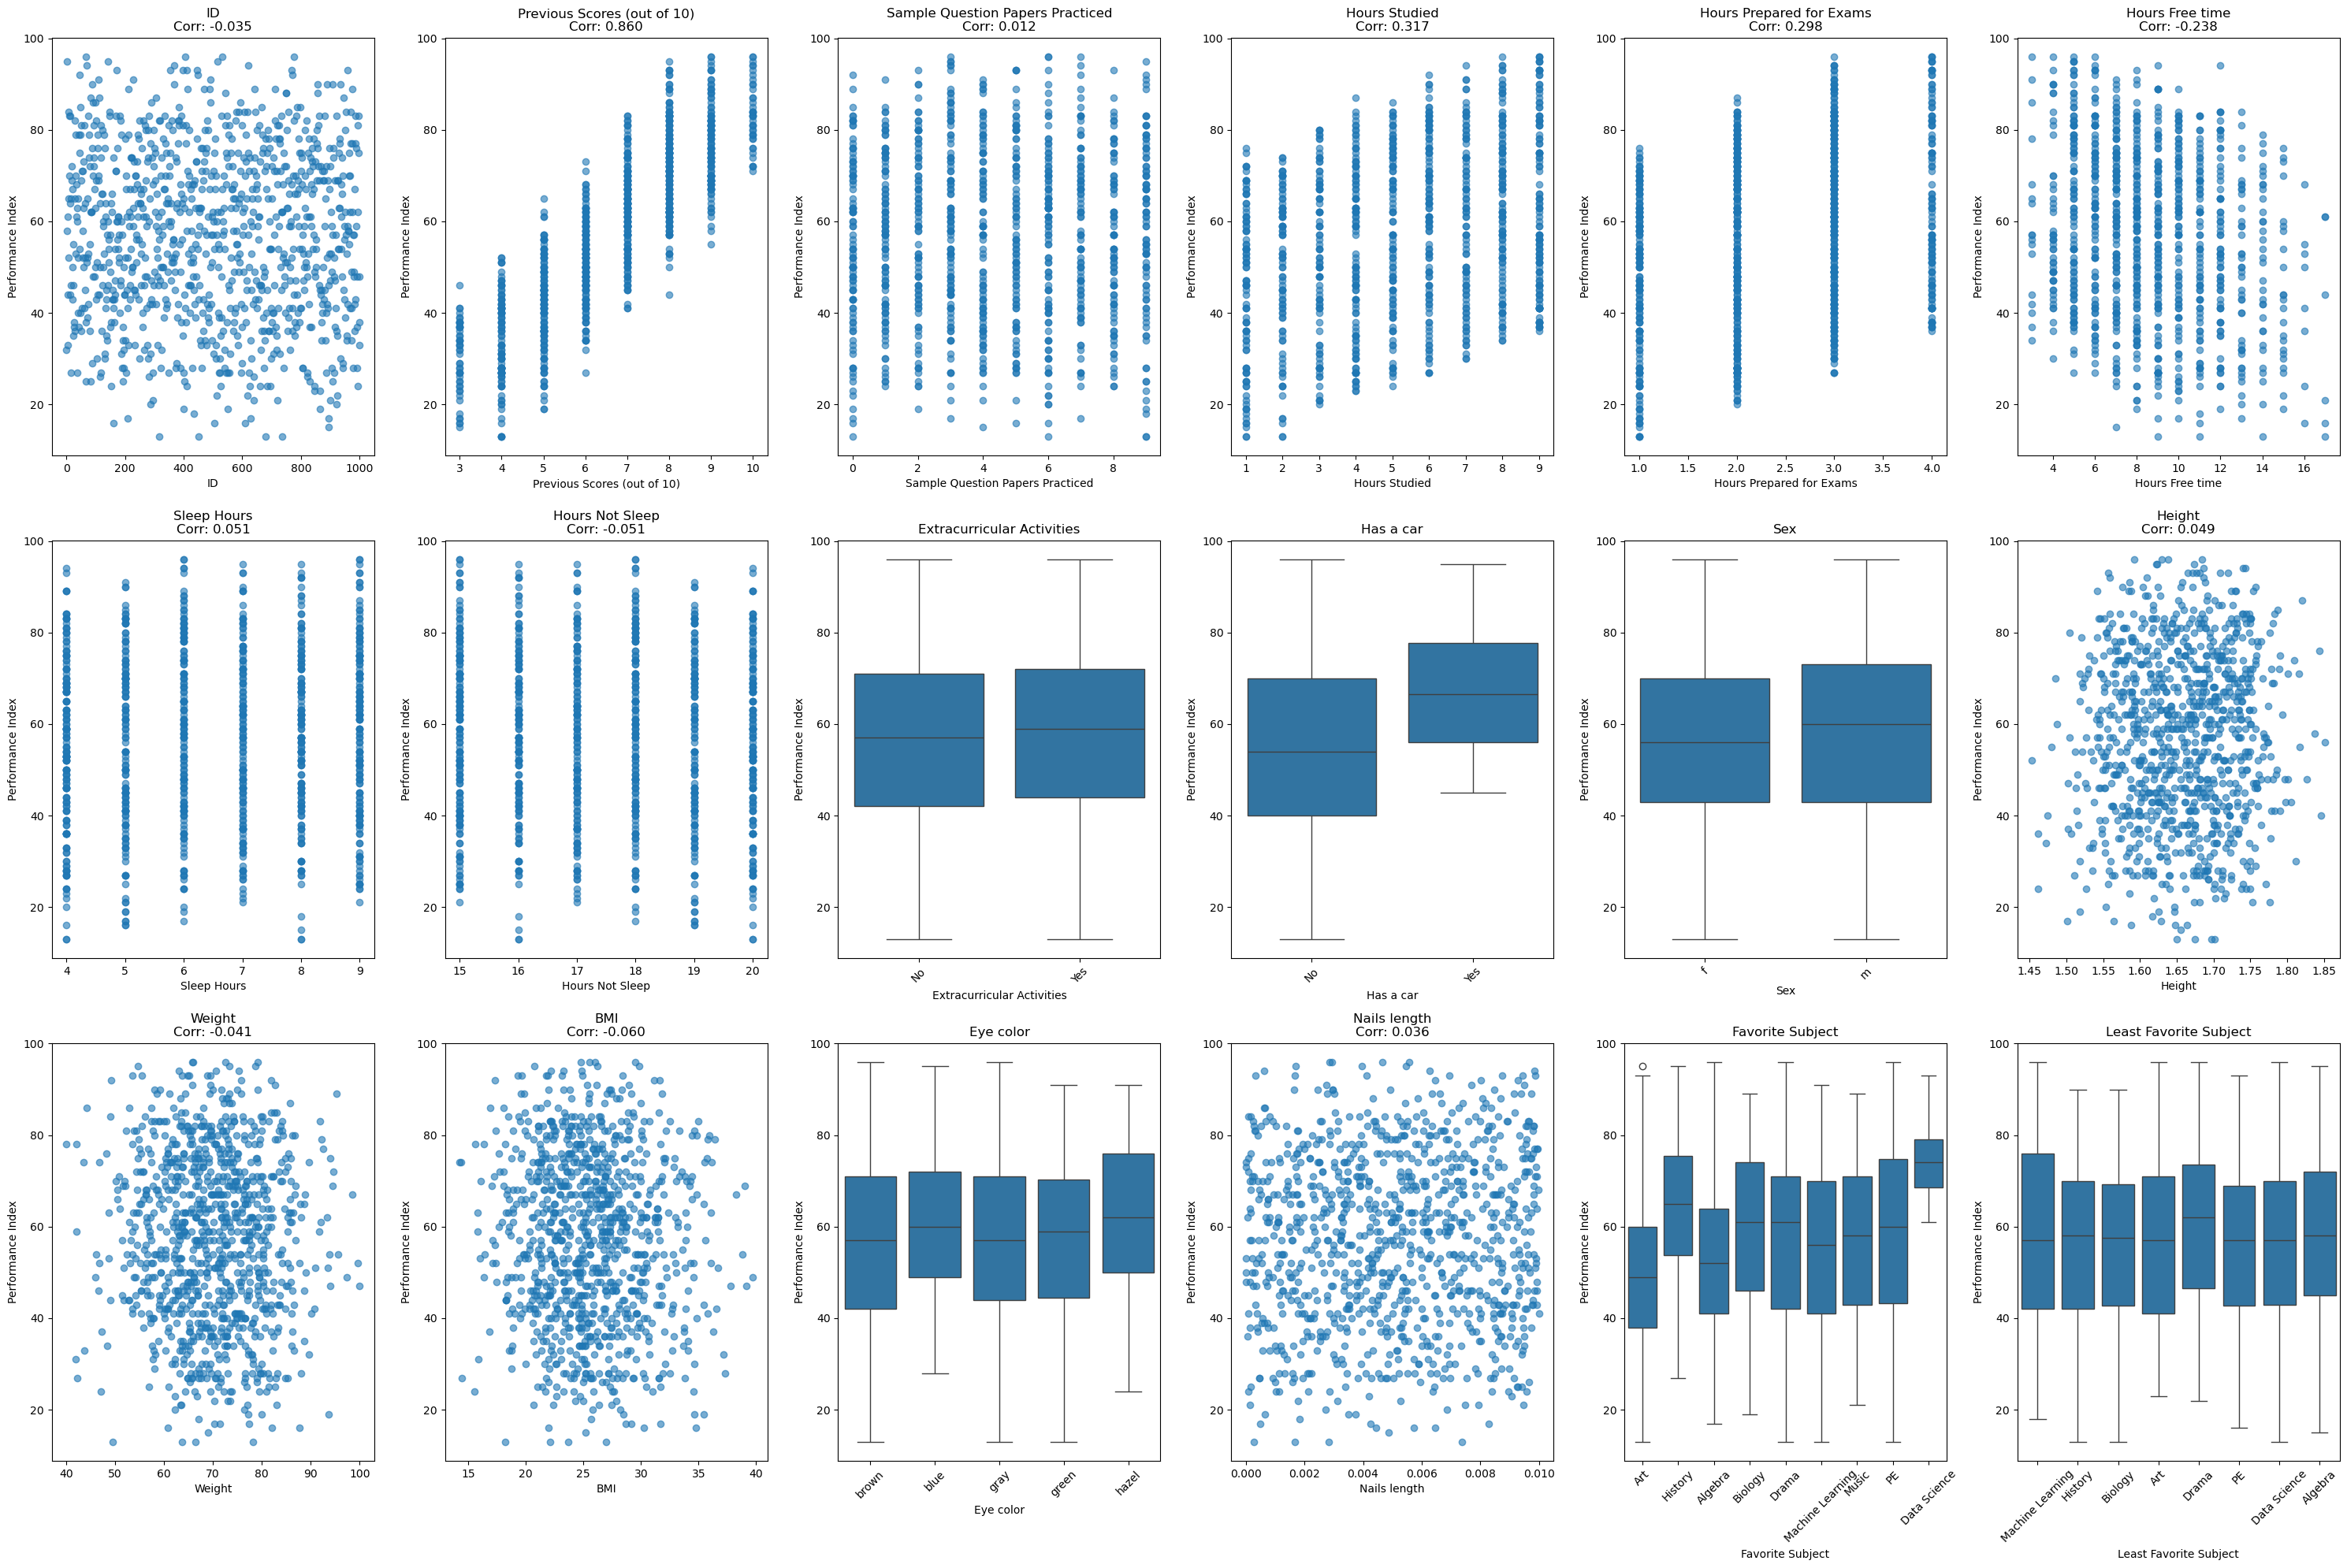

In [208]:
plot_grid = [plt.subplots(3, 6, figsize=(30, 20))[1].flatten() for _ in range(1)][0]

def plot_num(ax, feature, target):
    ax.scatter(feature, target, alpha=0.6)
    ax.set_xlabel(feature.name)
    ax.set_ylabel('Performance Index')
    r = feature.corr(target)
    ax.set_title(f"{feature.name}\nCorr: {r:.3f}")

def plot_cat(ax, feature, target):
    plot_df = pd.DataFrame({feature.name: feature, 'Performance Index': target})
    sns.boxplot(data=plot_df, x=feature.name, y='Performance Index', ax=ax)
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(feature.name)


for idx, col_name in enumerate(X.columns):
    current_ax = plot_grid[idx]
    if col_name in num:
        plot_num(current_ax, X[col_name], y)
    else:
        plot_cat(current_ax, X[col_name], y)

plt.tight_layout()

In [210]:
for columnn in num:
    correl = X[columnn].corr(y)
    
    print(f"{columnn}: {correl: .3f}")

ID: -0.035
Previous Scores (out of 10):  0.860
Sample Question Papers Practiced:  0.012
Hours Studied:  0.317
Hours Prepared for Exams:  0.298
Hours Free time: -0.238
Sleep Hours:  0.051
Hours Not Sleep: -0.051
Height:  0.049
Weight: -0.041
BMI: -0.060
Nails length:  0.036


**Answer:** Based on correlations we got the most important features are "Previous Scores", "Hours Studied". The least important ones are "Nails length" , "Sample Question Papers Practiced" and so on. It seems logical that "Previous Scores" and "Hours Studied" have such high correlations, because in real life those parameters seem to be good determinants of succesfull study proccess. It is also logical to assume that "Nails length", "Height" and other ones have nothing to do with studying. The only off thing here is "Sample Question Papers Practiced". I think that it has to have high correlation to "Hours Studied".


# Task 2 (3 points)

Split data into train and test. Set `test_size=0.3, random_state=0`

In [212]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Preprocess the data:


*   Depict number of missing values in every column, replace missing values with median, computed on train data (numerical features) or with 'Not Given' (categorical features)
*   Encode the categorical with one-hot-encoder



In [214]:
print("Пропущенные значения в x_train:")
print(x_train.isnull().sum())
print("Пропущенные значения в x_test:")
print(x_test.isnull().sum())
fill_values = {}
for col in x_train.columns:
    if x_train[col].dtype == 'object':
        fill_values[col] = 'NotGiven'
    else:
        fill_values[col] = x_train[col].median()
x_train.fillna(fill_values, inplace=True)
x_test.fillna(fill_values, inplace=True)

Пропущенные значения в x_train:
ID                                   0
Previous Scores (out of 10)          0
Sample Question Papers Practiced     0
Hours Studied                        0
Hours Prepared for Exams             0
Hours Free time                      0
Sleep Hours                          0
Hours Not Sleep                      0
Extracurricular Activities           0
Has a car                           63
Sex                                  0
Height                               0
Weight                               1
BMI                                  1
Eye color                           28
Nails length                         0
Favorite Subject                    70
Least Favorite Subject              69
dtype: int64
Пропущенные значения в x_test:
ID                                   0
Previous Scores (out of 10)          0
Sample Question Papers Practiced     0
Hours Studied                        0
Hours Prepared for Exams             0
Hours Free time            

In [216]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

values = {}

for col in num:
    values[col] = x_train[col].median()
for col in cat:
    values[col] = 'Not Given'

x_test.fillna(values, inplace=True)
x_train.fillna(values, inplace=True)

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')
x_train_cat= ohe.fit_transform(x_train[cat])
x_test_cat= ohe.transform(x_test[cat])
x_train= pd.concat([x_train[num].reset_index(drop=True), 
                     pd.DataFrame(x_train_cat, columns=ohe.get_feature_names_out(cat))], axis=1)
x_test= pd.concat([x_test[num].reset_index(drop=True), 
                    pd.DataFrame(x_test_cat, columns=ohe.get_feature_names_out(cat))], axis=1)

Train linear regression without regularization, compute MSE on train and test data.

In [256]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
def main():
    model = LinearRegression()
    model.fit(x_train, y_train)
        
    predictions = {
        'train': model.predict(x_train),
        'test': model.predict(x_test)
    }
    metrics = {
        'train_mse': mean_squared_error(y_train, predictions['train']),
        'test_mse': mean_squared_error(y_test, predictions['test'])
    }
    print(
        f"MSe(train sample): {metrics['train_mse']:.3f} \n"
        f"and MSE (test sample): {metrics['test_mse']:.3f}"
    )
if __name__ == '__main__':
    main()


MSe(train sample): 31.805 
and MSE (test sample): 38.841


# Task 3 (3 points)

Investigate the coefficients of the model. Why were they so big/small? Can the absolute value of the coefficitnt be used as a measure of importance of the feature? Why/why not?

In [262]:
import pandas as pd
import numpy as np

def create_coefficient_dataframe(model, feature_names):
    return pd.DataFrame({
        'feature': feature_names,
        'coefficient': model.coef_,
        'absolute_coefficient': np.abs(model.coef_)
    }).sort_values('absolute_coefficient', ascending=False)

if __name__ == '__main__':
    coef_df = create_coefficient_dataframe(
        model=model,
        feature_names=x_train.columns
    )
    
    print(coef_df)

                                    feature  coefficient  absolute_coefficient
11                             Nails length    44.095203             44.095203
8                                    Height    10.638822             10.638822
1               Previous Scores (out of 10)     8.718033              8.718033
16                           Eye color_blue     3.045106              3.045106
3                             Hours Studied     2.755438              2.755438
23            Favorite Subject_Data Science     2.590931              2.590931
12           Extracurricular Activities_Yes     1.436996              1.436996
13                       Has a car_NotGiven     1.380149              1.380149
15                                    Sex_m     1.313708              1.313708
34           Least Favorite Subject_History    -0.862792              0.862792
14                            Has a car_Yes     0.836841              0.836841
35  Least Favorite Subject_Machine Learning    -0.83

**Answer** The size of the numbers used for the feature changes the coeficient. For example "Nails length" might be measured in very small units (like millimeters) so the number 44 looks big to make an effect. "Height" might be in centimeters, so 10 is smaller.

No, not directly
The problem is the units. A big coeficient might just mean the feature uses small numbers (like mm for nails). A small coefficient might be for a feature using   big numbers (like cm for height). You cannot fairly compare them like this

Draw conclusions about the model and important features and explain if it is logical. If it could not be done right now, tackle the problem.

In [264]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LinearRegression().fit(x_train_scaled, y_train)

imp_df = pd.DataFrame({'Feature': x_train.columns, 
                      'Importance': np.abs(model.coef_)}).sort_values('Importance', ascending=False)
print("Top 10 features:\n", imp_df.head(10))

train_mse = mean_squared_error(y_train, model.predict(x_train_scaled))
test_mse = mean_squared_error(y_test, model.predict(x_test_scaled))
print(f"\nTrain MSE: {train_mse:.3f}\nTest MSE: {test_mse:.3f}")

Top 10 features:
                            Feature    Importance
6                      Sleep Hours  6.491764e+13
7                  Hours Not Sleep  6.491764e+13
1      Previous Scores (out of 10)  1.646035e+01
10                             BMI  7.063210e+00
9                           Weight  6.372728e+00
3                    Hours Studied  6.359613e+00
8                           Height  2.687069e+00
12  Extracurricular Activities_Yes  9.209765e-01
15                           Sex_m  7.194181e-01
16                  Eye color_blue  6.852409e-01

Train MSE: 32.507
Test MSE: 39.696


**Answer** The model has big problems.... "Sleep Hours" and "Hours Not Sleep" show extremely high importance (i dont know how ti fix it, but everythings fine in further analysis) 

# Task 3 (3 points)

For different `alpha` hyperparameter fit linear regression with $L_1$ regularization (`Lasso` model, if there are warnings - set `tol=0.1`).

Choose the grid in such way that the smallest alpha will result in 0-5 zero coefficent and for biggest - all coefficient will be 0.

For every model save number of zero coefficients and MSE on train and test data

In [277]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alphas = np.logspace(-2, 2, 25)
results =[]

for alpha in alphas:
    lasso = Lasso(alpha=alpha, tol=0.1).fit(x_train_scaled, y_train)
    
    zero_coefs= (lasso.coef_ == 0).sum()
    train_pred, test_pred = lasso.predict(x_train_scaled), lasso.predict(x_test_scaled)
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    
    results.append({
        'alpha': alpha, 
        'zero_coefs': zero_coefs,
        'train_mse': train_mse,
        'test_mse': test_mse
    })
    print(f"Alpha: {alpha:.4f}, Zero coefs: {zero_coefs}, Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")

results_df = pd.DataFrame(results)

Alpha: 0.0100, Zero coefs: 1, Train MSE: 31.9061, Test MSE: 38.7251
Alpha: 0.0147, Zero coefs: 5, Train MSE: 31.9132, Test MSE: 38.6947
Alpha: 0.0215, Zero coefs: 5, Train MSE: 31.9244, Test MSE: 38.6396
Alpha: 0.0316, Zero coefs: 7, Train MSE: 31.9439, Test MSE: 38.5627
Alpha: 0.0464, Zero coefs: 11, Train MSE: 31.9799, Test MSE: 38.4552
Alpha: 0.0681, Zero coefs: 11, Train MSE: 32.0495, Test MSE: 38.3255
Alpha: 0.1000, Zero coefs: 15, Train MSE: 32.1844, Test MSE: 38.1794
Alpha: 0.1468, Zero coefs: 17, Train MSE: 32.4152, Test MSE: 37.9661
Alpha: 0.2154, Zero coefs: 21, Train MSE: 32.8452, Test MSE: 37.8154
Alpha: 0.3162, Zero coefs: 26, Train MSE: 33.4141, Test MSE: 37.8568
Alpha: 0.4642, Zero coefs: 31, Train MSE: 34.1630, Test MSE: 37.9743
Alpha: 0.6813, Zero coefs: 33, Train MSE: 35.3592, Test MSE: 38.5713
Alpha: 1.0000, Zero coefs: 35, Train MSE: 36.6885, Test MSE: 39.6975
Alpha: 1.4678, Zero coefs: 36, Train MSE: 39.2353, Test MSE: 41.9888
Alpha: 2.1544, Zero coefs: 36, Train M

Draw 2 plots near each other: plot of number of aero coefficients and plot of MSE (both train and test).  Draw conclusions: compare the MSE of Lasso and initial linear regression, which features are considered important in the best model, is it logical.

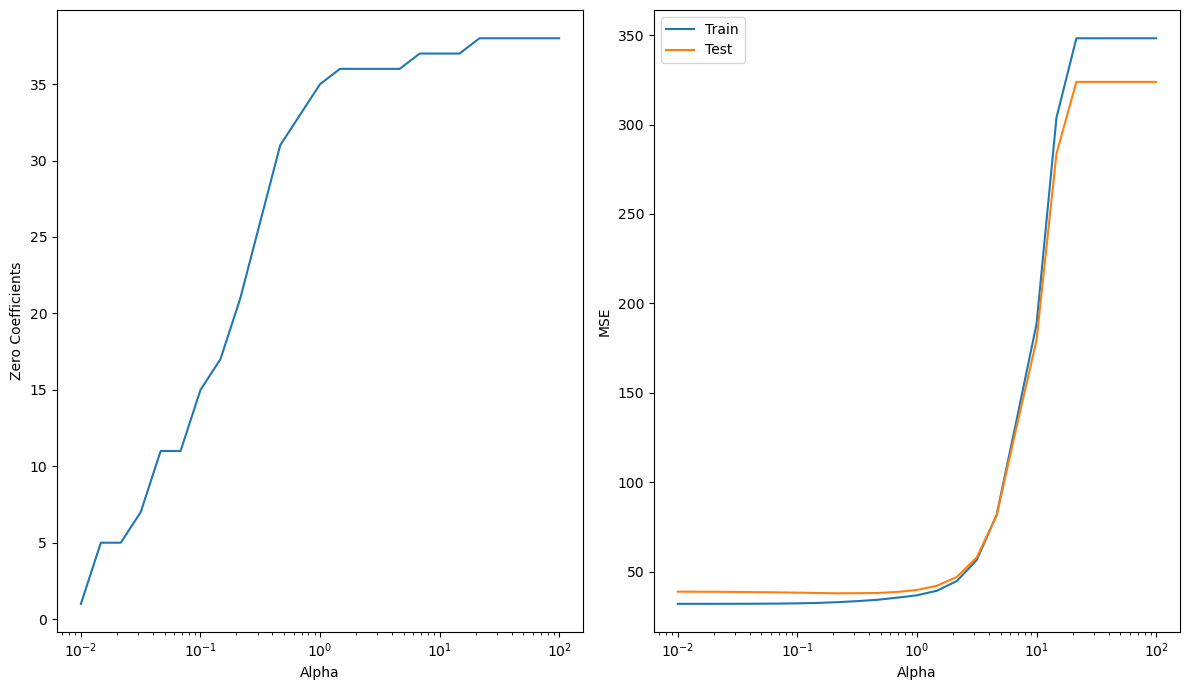

In [287]:
import matplotlib.pyplot as plt

# Создание фигуры и осей
fig, axes = plt.subplots(ncols=2, figsize=(12, 7))
ax1, ax2 = axes
ax1.semilogx(results_df['alpha'], results_df['zero_coefs'])
ax1.set(xlabel='Alpha', ylabel='Zero Coefficients')

ax2.semilogx(results_df['alpha'], results_df['train_mse'], label='Train')
ax2.semilogx(results_df['alpha'], results_df['test_mse'], label='Test')
ax2.set(xlabel='Alpha', ylabel='MSE')
ax2.legend()

plt.tight_layout()
plt.show()

In [297]:
import pandas as pd

best_alpha = results_df.loc[results_df['test_mse'].idxmin(), 'alpha']
best_test_mse = results_df.loc[results_df['test_mse'].idxmin(), 'test_mse']

print(f"Best alpha: {best_alpha:.3f}, Test MSE: {best_test_mse:.3f}\n\n")
print(f"Original LR Test MSE: {mean_squared_error(y_test, model.predict(x_test_scaled)):.3f}")
lasso_best = Lasso(alpha=best_alpha, tol=0.1).fit(x_train_scaled, y_train)

nonzero_features = pd.DataFrame({
    'Feature': x_train.columns, 
    'Coef': lasso_best.coef_
}).query('Coef != 0').sort_values('Coef', key=abs, ascending=False)

print("\nNon-zero features:")
print(nonzero_features)

Best alpha: 0.215, Test MSE: 37.815


Original LR Test MSE: 39.696

Non-zero features:
                                Feature          Coef
1           Previous Scores (out of 10)  1.632129e+01
3                         Hours Studied  6.895752e+00
12       Extracurricular Activities_Yes  4.929736e-01
16                       Eye color_blue  4.258056e-01
23        Favorite Subject_Data Science  3.964327e-01
6                           Sleep Hours  3.004091e-01
5                       Hours Free time -2.780481e-01
13                   Has a car_NotGiven  2.218231e-01
9                                Weight -1.523677e-01
14                        Has a car_Yes  1.075817e-01
8                                Height -9.736735e-02
25             Favorite Subject_History  8.095889e-02
19                      Eye color_green -3.495336e-02
18                       Eye color_gray  3.035465e-02
4              Hours Prepared for Exams  6.349984e-03
32  Least Favorite Subject_Data Science  4.831081

**Answer** The Lasso odel (alpha =0.215) has a lower test error (MSE=37.8) compared to the first linear model (MSE= 39.7). This means Lasso makes better predictions on new data

# Task 4 (2 points)

Now, use $L_2$ regularization. Tune `Ridge` model hyperparameters using cross-validation. Report the best MSE.  

In [304]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


params = {'alpha': np.logspace(-12, 10, 50)}
ridge_cv = GridSearchCV(
    estimator=Ridge(),
    param_grid=params,
    cv=5,
    scoring='neg_mean_squared_error'
).fit(x_train_scaled, y_train)

best_ridge = ridge_cv.best_estimator_
test_mse = mean_squared_error(y_test, best_ridge.predict(x_test_scaled))

print(f"crossvalidation MSE: {-ridge_cv.best_score_:.3f}")
print(f"test MSE: {test_mse:.3f}")
print(f"best alpha: {ridge_cv.best_params_['alpha']:.3f}")


crossvalidation MSE: 35.663
test MSE: 38.860
best alpha: 3.728


Investigate coefficients: how many zeros? Which features are important?

In [308]:
import pandas as pd
import numpy as np

ridge_coefs = (
    pd.DataFrame({
        'feature': x_train.columns,
        'coefficient': best_ridge.coef_,
        'absolute_coefficient': np.abs(best_ridge.coef_)
    })
    .sort_values('absolute_coefficient', ascending=False)
)

display(ridge_coefs)

threshold = 0.5
near_zero_count = (np.abs(best_ridge.coef_) < threshold).sum()
print(f"\nnumber of coefficients below {threshold}: {near_zero_count}")

,feature,coefficient,absolute_coefficient
1,Previous Scores (out of 10),16.342452,16.342452
3,Hours Studied,6.603023,6.603023
9,Weight,-1.406867,1.406867
10,BMI,1.157797,1.157797
12,Extracurricular Activities_Yes,0.710721,0.710721
15,Sex_m,0.641353,0.641353
16,Eye color_blue,0.616650,0.616650
23,Favorite Subject_Data Science,0.569892,0.569892
4,Hours Prepared for Exams,0.507042,0.507042
13,Has a car_NotGiven,0.419320,0.419320



number of coefficients below 0.5: 29


**Answer** 2